In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from Bio import Entrez
import requests
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
from collections import defaultdict
from collections import Counter

import gensim
import nltk
from nltk.stem import WordNetLemmatizer
np.random.seed(2018)
from nltk.stem.porter import PorterStemmer
from string import punctuation
import pickle
from gensim.models.doc2vec import LabeledSentence
from sklearn.metrics.pairwise import cosine_similarity
import scipy

In [2]:
base_dir='/Volumes/Yuchen_Drive/Insight/OncoMatch'
oncokb_df=pd.read_csv(os.path.join(base_dir,'data/cancerGeneList.tsv'),sep='\t')

In [95]:
oncokb_df=oncokb_df.sort_values(by=['Hugo Symbol'])
oncokb_df.head()

,Hugo Symbol,Entrez Gene ID,# of occurrence within resources (Column D-J),OncoKB Annotated,Is Oncogene,Is Tumor Suppressor Gene,MSK-IMPACT,MSK-HEME,FOUNDATION ONE,FOUNDATION ONE HEME,Vogelstein,SANGER CGC(05/30/2017)
953,ABI1,10006,2,No,No,No,No,No,No,Yes,No,Yes
39,ABL1,25,7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
42,ABL2,27,3,Yes,Yes,No,No,No,No,Yes,No,Yes
910,ACKR3,57007,1,No,No,No,No,No,No,No,No,Yes
101,ACSL3,2181,1,No,No,No,No,No,No,No,No,Yes


In [4]:
oncokb_df.shape

(1053, 12)

In [5]:
oncokb_df=oncokb_df[oncokb_df['OncoKB Annotated']=='Yes']

In [6]:
print(oncokb_df.shape)

(669, 12)


### Combined function

In [151]:
def extract_gene_info(gene_list):
    gene_dict=defaultdict(list)
    base_url='https://ghr.nlm.nih.gov/gene/{}#synonyms'
    for gene in gene_list:
        search_url=base_url.replace("{}",gene)
    
        # get html of search results page
        html = requests.get(search_url).content
        soup = BeautifulSoup(html,'html.parser')
        ## get list of gene alias
        genes = soup.find_all('div',{'class':'col-md-8'})
        if len(genes) ==4:
            genes=genes[3]
            for i in genes.find_all('li'):
                gene_dict[gene].append(i.get_text())
    return gene_dict

In [154]:
oncokb_df=pd.read_csv(os.path.join(base_dir,'data/cancerGeneList.tsv'),sep='\t')
oncokb_df=oncokb_df.sort_values(by=['Hugo Symbol'])
oncokb_df=oncokb_df[oncokb_df['OncoKB Annotated']=='Yes']
gene_list=oncokb_df['Hugo Symbol'].values
print(len(gene_list))

669


In [155]:
alias_dict=extract_gene_info(gene_list)

In [198]:
alias_dict['BRCA1/2'].append('BRCA')
alias_dict['BRCA1/2'].append('BRCA1/2')

In [197]:
del alias_dict['BRCA1']
del alias_dict['BRCA2']

In [202]:
pickle.dump(alias_dict, open(os.path.join(base_dir, "data/Oncokb_info_421_alias_dict.pkl"), "wb"))

In [315]:
alias_dict=pickle.load(open(os.path.join(base_dir, "data/Oncokb_info_421_alias_dict.pkl"),"rb"))

In [316]:
len(alias_dict)

421

In [317]:
alias_dict

defaultdict(list,
            {'ABL1': ['Abelson tyrosine-protein kinase 1',
              'ABL',
              'bcr/abl',
              'bcr/c-abl oncogene protein',
              'c-ABL',
              'c-abl oncogene 1, receptor tyrosine kinase',
              'c-ABL1',
              'JTK7',
              'p150',
              'proto-oncogene c-Abl',
              'proto-oncogene tyrosine-protein kinase ABL1',
              'tyrosine-protein kinase ABL1 isoform a',
              'tyrosine-protein kinase ABL1 isoform b',
              'v-abl',
              'v-abl Abelson murine leukemia viral oncogene homolog 1',
              'ABL1'],
             'ACTG1': ['ACT',
              'ACTG',
              'ACTG_HUMAN',
              'actin-like protein',
              'actin, cytoplasmic 2',
              'actin, gamma 1',
              'cytoskeletal gamma-actin',
              'deafness, autosomal dominant 20',
              'deafness, autosomal dominant 26',
              'DFNA20',
   

In [304]:
alias_dict.keys()

dict_keys(['ABL1', 'ACTG1', 'ACVR1', 'AKT1', 'AKT2', 'AKT3', 'ALB', 'ALK', 'ALOX12B', 'AMER1', 'ANKRD11', 'APC', 'AR', 'ARID1A', 'ARID1B', 'ARID2', 'ARID5B', 'ASXL1', 'ASXL2', 'ATF1', 'ATM', 'ATP6AP1', 'ATP6V1B2', 'ATR', 'ATRX', 'ATXN2', 'ATXN7', 'AURKB', 'AXIN1', 'AXIN2', 'AXL', 'B2M', 'BAP1', 'BCL10', 'BCL11B', 'BCL2', 'BCL6', 'BCL9', 'BCOR', 'BCORL1', 'BCR', 'BIRC3', 'BLM', 'BMPR1A', 'BRAF', 'BRD4', 'BRIP1', 'BTG1', 'BTK', 'CALR', 'CARD11', 'CASP8', 'CBFB', 'CBL', 'CCND1', 'CCND2', 'CD274', 'CD28', 'CD58', 'CD79A', 'CD79B', 'CDC42', 'CDC73', 'CDH1', 'CDK12', 'CDK4', 'CDK6', 'CDKN1B', 'CDKN2A', 'CEBPA', 'CHEK2', 'CIC', 'CIITA', 'CRBN', 'CREB1', 'CREBBP', 'CSF1R', 'CSF3R', 'CTCF', 'CTLA4', 'CTNNB1', 'CUL3', 'CUX1', 'CXCR4', 'CYLD', 'CYP19A1', 'DDIT3', 'DDR2', 'DDX3X', 'DEK', 'DICER1', 'DNMT1', 'DNMT3A', 'DNMT3B', 'DOT1L', 'DROSHA', 'EED', 'EGFR', 'EIF4E', 'EP300', 'EPAS1', 'EPCAM', 'EPHA3', 'EPOR', 'ERBB2', 'ERBB3', 'ERBB4', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERF', 'ERG', 'ESCO2', '

### flatten alias

In [205]:
alias_df = pd.DataFrame.from_dict(alias_dict, orient='index')
alias_df['HGNC']=alias_df.index
alias_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,HGNC
ABL1,Abelson tyrosine-protein kinase 1,ABL,bcr/abl,bcr/c-abl oncogene protein,c-ABL,"c-abl oncogene 1, receptor tyrosine kinase",c-ABL1,JTK7,p150,proto-oncogene c-Abl,...,None,None,None,None,None,None,None,None,None,ABL1
ACTG1,ACT,ACTG,ACTG_HUMAN,actin-like protein,"actin, cytoplasmic 2","actin, gamma 1",cytoskeletal gamma-actin,"deafness, autosomal dominant 20","deafness, autosomal dominant 26",DFNA20,...,None,None,None,None,None,None,None,None,None,ACTG1
ACVR1,activin A receptor type I,"activin A receptor, type I","activin A receptor, type II-like kinase 2",activin A type I receptor,activin A type I receptor precursor,"ActR-IA protein, human",ACTRI,ACVR1_HUMAN,ACVR1A,ACVRLK2,...,None,None,None,None,None,None,None,None,None,ACVR1
AKT1,AKT,AKT1_HUMAN,MGC99656,PKB,PKB-ALPHA,PKB alpha,PRKBA,protein kinase B alpha,proto-oncogene c-Akt,RAC,...,None,None,None,None,None,None,None,None,None,AKT1
AKT2,HIHGHH,PKBB,PKBBETA,PRKBB,RAC-BETA,AKT2,None,None,None,None,...,None,None,None,None,None,None,None,None,None,AKT2


In [206]:
alias_df=pd.DataFrame({'HGNC':np.array(list(alias_dict.keys())),'alias_list':list(alias_dict.values())})
alias_df.apply(lambda x:x['alias_list'].append(x['HGNC']),axis=1)
alias_df.head()

,HGNC,alias_list
0,ABL1,"[Abelson tyrosine-protein kinase 1, ABL, bcr/a..."
1,ACTG1,"[ACT, ACTG, ACTG_HUMAN, actin-like protein, ac..."
2,ACVR1,"[activin A receptor type I, activin A receptor..."
3,AKT1,"[AKT, AKT1_HUMAN, MGC99656, PKB, PKB-ALPHA, PK..."
4,AKT2,"[HIHGHH, PKBB, PKBBETA, PRKBB, RAC-BETA, AKT2,..."


In [207]:
alias_df.iloc[0,1]

['Abelson tyrosine-protein kinase 1',
 'ABL',
 'bcr/abl',
 'bcr/c-abl oncogene protein',
 'c-ABL',
 'c-abl oncogene 1, receptor tyrosine kinase',
 'c-ABL1',
 'JTK7',
 'p150',
 'proto-oncogene c-Abl',
 'proto-oncogene tyrosine-protein kinase ABL1',
 'tyrosine-protein kinase ABL1 isoform a',
 'tyrosine-protein kinase ABL1 isoform b',
 'v-abl',
 'v-abl Abelson murine leukemia viral oncogene homolog 1',
 'ABL1',
 'ABL1']

In [208]:
alias_df['combined']=alias_df.apply(lambda row:[(row['HGNC'], s) for s in row['alias_list']],axis=1)

In [209]:
alias_flattened=[a for pair in alias_df.combined for a in pair]
print(len(alias_flattened))

3884


In [210]:
alias_flattened_df=pd.DataFrame.from_records(alias_flattened)
alias_flattened_df.columns=['HGNC', 'alias']
alias_flattened_df['alias_lower']=alias_flattened_df.alias.apply(lambda x:x.lower())
alias_flattened_df.head()

,HGNC,alias,alias_lower
0,ABL1,Abelson tyrosine-protein kinase 1,abelson tyrosine-protein kinase 1
1,ABL1,ABL,abl
2,ABL1,bcr/abl,bcr/abl
3,ABL1,bcr/c-abl oncogene protein,bcr/c-abl oncogene protein
4,ABL1,c-ABL,c-abl


In [211]:
pickle.dump(alias_flattened_df, open(os.path.join(base_dir,"data/alias_df.pkl"), "wb"))

In [212]:
alias_flattened_df=pickle.load(open(os.path.join(base_dir, "data/alias_df.pkl"),"rb"))

In [213]:
print('Number of unique HGNC: {}'.format(alias_flattened_df.HGNC.nunique()))

Number of unique HGNC: 421


In [214]:
alias_dict2={}
for i in range(len(alias_flattened_df)):
    alias_dict2[alias_flattened_df.iloc[i,2]]=alias_flattened_df.iloc[i,0]

In [215]:
print(len(alias_dict2))

3325


### tokenize abstract -- same as LDA
20200116_abstract_LDA

In [114]:
abstract_df=pd.read_csv(os.path.join(base_dir, 'data/abstract_citation_df_50930.csv'),index_col='pmid')
abstract_df.shape

(50930, 8)

In [115]:
stop_word1 = gensim.parsing.preprocessing.STOPWORDS   ## 337
stop_word2 = nltk.corpus.stopwords.words('english')   ## 179
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
custom_words = ["fig", "figure", "et", "al", "al.", "also",
                "data", "analyze", "study", "table", "using",
                "method", "result", "conclusion", "author", 
                "find", "found", "show", '"', "’", "“", "”", 'analysis','analyses','analyzed','results','figures'
                "assayed", "assay", "assays","figures", "figure","data", "sample","samples","table","tables",
                'proteins','protein','cells','cell','genes','gene',
                'mutated','mutation','mutational','mutations','mutate','mutant','mutants',
                'cancer','cancers','tumor','tumors','variant','variants','biology','biological']
stop_words = set(list(stop_word1)+stop_word2+list(punct)+custom_words)   ## 493

In [116]:
len(stop_words)

493

In [117]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        temp=WordNetLemmatizer().lemmatize(token).lower()
        if len(temp)>1 and temp not in stop_words:
            result.append(temp)
    return result

In [118]:
WordNetLemmatizer().lemmatize('BRCA2').lower()

'brca2'

In [119]:
abstract_df['abstract_processed']=abstract_df.abstract.apply(lambda x:preprocess(x))

In [120]:
abstract_df['abstract_counter']=abstract_df.abstract_processed.apply(lambda x:Counter(x))

In [121]:
abstract_df['unique_words']=abstract_df.abstract_counter.apply(lambda x:list(x.keys()))

In [122]:
abstract_df.head()

,article_title,journal_title,journal_abbre,article_date,abstract,article_type,pub_days,citation,abstract_processed,abstract_counter,unique_words
pmid,,,,,,,,,,,
2357786,Pseudohypoproteinemia and multiple myeloma.,Cleveland Clinic journal of medicine,Cleve Clin J Med,1990-05-01,Paraproteinemia is an important diagnostic fea...,Case Reports,10857.0,1.0,"[paraproteinemia, important, diagnostic, featu...","{'paraproteinemia': 1, 'important': 1, 'diagno...","[paraproteinemia, important, diagnostic, featu..."
7512659,Comparison of digital rectal examination and s...,The Journal of urology,J. Urol.,1994-05-01,To compare the efficacy of digital rectal exam...,Clinical Trial,9396.0,1218.0,"[compare, efficacy, digital, rectal, examinati...","{'compare': 1, 'efficacy': 1, 'digital': 11, '...","[compare, efficacy, digital, rectal, examinati..."
7523707,Accuracy of digital rectal examination and tra...,The Journal of urology,J. Urol.,1994-11-01,Not all prostate cancers are sonographically h...,Clinical Trial,9212.0,116.0,"[prostate, sonographically, hypoechoic, palpab...","{'prostate': 4, 'sonographically': 3, 'hypoech...","[prostate, sonographically, hypoechoic, palpab..."
7525995,Selection of optimal prostate specific antigen...,The Journal of urology,J. Urol.,1994-12-01,A prospective clinical trial of prostate cance...,Clinical Trial,9182.0,230.0,"[prospective, clinical, trial, prostate, scree...","{'prospective': 1, 'clinical': 1, 'trial': 1, ...","[prospective, clinical, trial, prostate, scree..."
7692657,Effect of patient age on early detection of pr...,Urology,Urology,1993-10-01,This study was designed to determine the effec...,Clinical Trial,9608.0,132.0,"[wa, designed, determine, effect, age, decade,...","{'wa': 4, 'designed': 1, 'determine': 1, 'effe...","[wa, designed, determine, effect, age, decade,..."


In [216]:
abstract_df['alias_set']=abstract_df.unique_words.apply(lambda x:set(alias_flattened_df.alias_lower.values).intersection(set(x)))

In [217]:
abstract_df['HGNC_set']=abstract_df.alias_set.apply(lambda x:set([alias_dict2.get(i) for i in x]))

In [218]:
abstract_df.head(20)

,article_title,journal_title,journal_abbre,article_date,abstract,article_type,pub_days,citation,abstract_processed,abstract_counter,unique_words,alias_set,HGNC_set
pmid,,,,,,,,,,,,,
2357786,Pseudohypoproteinemia and multiple myeloma.,Cleveland Clinic journal of medicine,Cleve Clin J Med,1990-05-01,Paraproteinemia is an important diagnostic fea...,Case Reports,10857.0,1.0,"[paraproteinemia, important, diagnostic, featu...","{'paraproteinemia': 1, 'important': 1, 'diagno...","[paraproteinemia, important, diagnostic, featu...",{},{}
7512659,Comparison of digital rectal examination and s...,The Journal of urology,J. Urol.,1994-05-01,To compare the efficacy of digital rectal exam...,Clinical Trial,9396.0,1218.0,"[compare, efficacy, digital, rectal, examinati...","{'compare': 1, 'efficacy': 1, 'digital': 11, '...","[compare, efficacy, digital, rectal, examinati...",{},{}
7523707,Accuracy of digital rectal examination and tra...,The Journal of urology,J. Urol.,1994-11-01,Not all prostate cancers are sonographically h...,Clinical Trial,9212.0,116.0,"[prostate, sonographically, hypoechoic, palpab...","{'prostate': 4, 'sonographically': 3, 'hypoech...","[prostate, sonographically, hypoechoic, palpab...",{},{}
7525995,Selection of optimal prostate specific antigen...,The Journal of urology,J. Urol.,1994-12-01,A prospective clinical trial of prostate cance...,Clinical Trial,9182.0,230.0,"[prospective, clinical, trial, prostate, scree...","{'prospective': 1, 'clinical': 1, 'trial': 1, ...","[prospective, clinical, trial, prostate, scree...",{},{}
7692657,Effect of patient age on early detection of pr...,Urology,Urology,1993-10-01,This study was designed to determine the effec...,Clinical Trial,9608.0,132.0,"[wa, designed, determine, effect, age, decade,...","{'wa': 4, 'designed': 1, 'determine': 1, 'effe...","[wa, designed, determine, effect, age, decade,...",{},{}
8678767,The role of whole-body positron emission tomog...,"Archives of surgery (Chicago, Ill. : 1960)",Arch Surg,1996-07-01,To compare the accuracy of whole-body position...,Clinical Trial,8604.0,219.0,"[compare, accuracy, body, position, emission, ...","{'compare': 1, 'accuracy': 1, 'body': 1, 'posi...","[compare, accuracy, body, position, emission, ...",{},{}
9306419,Biology and treatment of chronic myelogenous l...,"Oncology (Williston Park, N.Y.)","Oncology (Williston Park, N.Y.)",1997-09-01,Chronic myelogenous leukemia (CML) involves th...,Journal Article,8177.0,8.0,"[chronic, myelogenous, leukemia, cml, involves...","{'chronic': 2, 'myelogenous': 1, 'leukemia': 1...","[chronic, myelogenous, leukemia, cml, involves...","{cml, abl, bcr}","{BCR, ABL1}"
10037348,In vivo trial comparing patients' tolerance of...,Lasers in surgery and medicine,Lasers Surg Med,1999-01-01,Different types of Q-switched lasers have been...,Clinical Trial,7690.0,59.0,"[different, type, switched, laser, effective, ...","{'different': 2, 'type': 1, 'switched': 3, 'la...","[different, type, switched, laser, effective, ...",{aim},{DNMT1}
10079468,Chronic myelogenous leukemia: update on biolog...,"Oncology (Williston Park, N.Y.)","Oncology (Williston Park, N.Y.)",1999-02-01,Chronic myelogenous leukemia (CML) is a myelop...,Comparative Study,7659.0,73.0,"[chronic, myelogenous, leukemia, cml, disorder...","{'chronic': 3, 'myelogenous': 2, 'leukemia': 2...","[chronic, myelogenous, leukemia, cml, disorder...","{cml, abl, bcr}","{BCR, ABL1}"


### flatten HGNC

In [219]:
HGNC_df=abstract_df.copy()
HGNC_df['pmid']=HGNC_df.index
HGNC_df['combined']=HGNC_df.apply(lambda row:[(row.pmid, s) for s in row['HGNC_set']],axis=1)
HGNC_flattened=[c for pair in HGNC_df.combined for c in pair]
print(len(HGNC_flattened))
HGNC_flattened_df=pd.DataFrame.from_records(HGNC_flattened)
HGNC_flattened_df.columns=['pmid', 'HGNC']
HGNC_flattened_df.head()

31530


,pmid,HGNC
0,9306419,BCR
1,9306419,ABL1
2,10037348,DNMT1
3,10079468,BCR
4,10079468,ABL1


In [220]:
pickle.dump(HGNC_flattened_df, open(os.path.join(base_dir, "data/HGNC_df2.pkl"), "wb"))

In [221]:
HGNC_flattened_df=pickle.load(open(os.path.join(base_dir, "data/HGNC_df2.pkl"),"rb"))

In [222]:
HGNC_flattened_df.to_csv(os.path.join(base_dir, "data/HGNC_df2.csv"),index=False)

In [329]:
HGNC_flattened_df=pd.read_csv(os.path.join(base_dir, "data/HGNC_df2.csv"))

In [330]:
HGNC_flattened_df.pmid.nunique()

20448

In [331]:
HGNC_flattened_df.HGNC.nunique()

206

In [305]:
HGNC_flattened_df.HGNC.unique()

array(['BCR', 'ABL1', 'DNMT1', 'AKT1', 'GLI1', 'CTLA4', 'SMARCA2', 'RB1',
       'ACTG1', 'APC', 'KMT2A', 'MET', 'SOS1', 'HGF', 'VEGFA', 'FLT1',
       'RTEL1', 'SDHB', 'MYC', 'EGFR', 'CALR', 'FH', 'BRCA1/2', 'SDHD',
       'HLA-C', 'ARID1A', 'DDIT3', 'FAT1', 'ERBB2', 'KIT', 'SRC', 'REL',
       'NTRK1', 'XIAP', 'AR', 'NKX2-1', 'ATM', 'MITF', 'YY1', 'INSR',
       'MSH2', 'PTEN', 'FANCC', 'CBL', 'RUNX1T1', 'CASP8', 'RIT1', 'ESR1',
       'REST', 'PGR', 'IGF1', 'VHL', 'NR4A3', 'FANCA', 'CYP19A1', 'RARA',
       'BLM', 'MAX', 'ETV6', 'MYCN', 'RET', 'EPCAM', 'ERCC4', 'U2AF1',
       'PPARG', 'GATA3', 'EIF4E', 'RASA1', 'LYN', 'CDKN2A', 'KDR',
       'AXIN1', 'IGF1R', 'SDHA', 'FOXP1', 'PDGFB', 'NPM1', 'NFKBIA',
       'CREB1', 'SDHC', 'ALK', 'BRD4', 'MST1', 'NT5C2', 'MTOR', 'MST1R',
       'CD79A', 'IRF8', 'PAX5', 'BRAF', 'MAP3K1', 'PDGFRA', 'CTCF',
       'FANCD2', 'FOXO1', 'PRKAR1A', 'MTAP', 'RELN', 'MEN1', 'GNAS',
       'ERCC2', 'MSH3', 'ALB', 'DDX3X', 'STK11', 'ARID1B', 'POLE', 'ATR',


In [324]:
HGNC_206_df = pd.DataFrame({'HGNC':HGNC_flattened_df.HGNC.unique()}).sort_values(by=['HGNC'])
HGNC_206_df.head()

,HGNC
1,ABL1
8,ACTG1
3,AKT1
102,ALB
80,ALK


In [325]:
HGNC_206_df.to_csv(os.path.join(base_dir, 'data/HGNC_206_df.csv'),index=False)

In [326]:
HGNC_206_df=pd.read_csv(os.path.join(base_dir, 'data/HGNC_206_df.csv'))
HGNC_206_df.head()

,HGNC
0,ABL1
1,ACTG1
2,AKT1
3,ALB
4,ALK


In [307]:
HGNC_counts = HGNC_flattened_df.HGNC.value_counts().to_frame().reset_index().rename(columns={'HGNC':'counts', 'index':'HGNC'})
HGNC_counts.head()

,HGNC,counts
0,CTLA4,2870
1,DNMT1,1893
2,EGFR,1835
3,ESR1,1611
4,MET,1518


Text(0.5, 0, 'Number of occurrences')

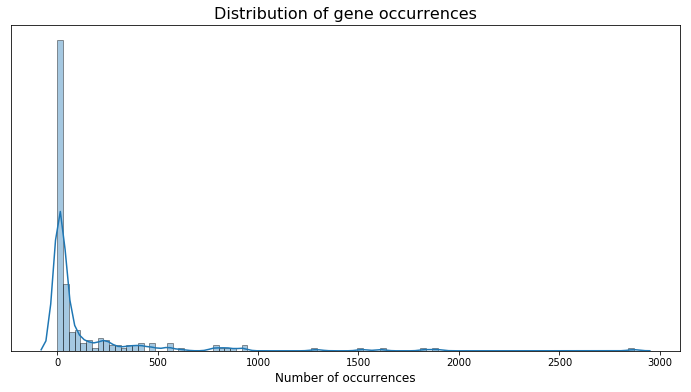

In [310]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
sns.distplot(HGNC_counts.counts,hist=True,bins=100,ax=ax,hist_kws={'edgecolor':'black'})
ax.set_title('Distribution of gene occurrences',fontsize=16)
ax.set_yticks([])
ax.set_xlabel('Number of occurrences',fontsize=12)

In [362]:
search_url='https://www.cancer.net/cancer-types'

In [363]:
#get html of search results page
html = requests.get(search_url).content

In [364]:
soup = BeautifulSoup(html,'html.parser')

In [367]:
## get list of gene alias
lis = soup.find_all('div',{'class':'item-list'})

In [378]:
cancer_list=[]
for i in range(2,len(lis)):
    for li in lis[i].find_all('li'):
        cancer_list.append(li.get_text())

In [379]:
len(cancer_list)

123

In [381]:
cancer_list

['\n Adenoid Cystic Carcinoma ',
 '\n Adrenal Gland Tumor ',
 '\n Amyloidosis ',
 '\n Anal Cancer ',
 '\n Appendix Cancer ',
 '\n Astrocytoma - Childhood ',
 '\n Ataxia-Telangiectasia ',
 '\n Beckwith-Wiedemann Syndrome ',
 '\n Bile Duct Cancer (Cholangiocarcinoma) ',
 '\n Birt-Hogg-Dubé Syndrome ',
 '\n Bladder Cancer ',
 '\n Bone Cancer ',
 '\n Brain Stem Glioma - Childhood ',
 '\n Brain Tumor ',
 '\n Breast Cancer ',
 '\n Breast Cancer - Inflammatory ',
 '\n Breast Cancer - Metastatic ',
 '\n Breast Cancer in Men ',
 '\n Carney Complex ',
 '\n Central Nervous System Tumors - Childhood ',
 '\n Cervical Cancer ',
 '\n Childhood Cancer ',
 '\n Colorectal Cancer ',
 '\n Cowden Syndrome ',
 '\n Craniopharyngioma - Childhood ',
 '\n Desmoplastic Infantile Ganglioglioma, Childhood Tumor ',
 '\n Ependymoma - Childhood ',
 '\n Esophageal Cancer ',
 '\n Ewing Sarcoma - Childhood and Adolescence ',
 '\n Eye Cancer ',
 '\n Eyelid Cancer ',
 '\n Familial Adenomatous Polyposis ',
 '\n Familial GI

In [390]:
pediatric_list=set(['child', 'children', 'childhood', 'pediatric', 'pediatrics'])
abstract_df['pediatric']=abstract_df.unique_words.apply(lambda x:True if len(pediatric_list.intersection(set(x)))>0 else False)

In [391]:
abstract_df.pediatric.value_counts()

False    35096
True      2140
Name: pediatric, dtype: int64

In [392]:
metastatic_list=set(['metastatic', 'metastasis', 'metastasize'])
abstract_df['metastasis']=abstract_df.unique_words.apply(lambda x:True if len(metastatic_list.intersection(set(x)))>0 else False)
abstract_df.metastasis.value_counts()

False    29140
True      8096
Name: metastasis, dtype: int64

### Annotate each abstract

In [286]:
def annotate_abstract(text):
    cancer_type=[]
    cancer_list1=['adrenocortical', 'anal', 'appendix', 'bladder', 'bone', 'breast', 'cervical', 'gallbladder', 'ovarian', 'penile', 'prostate', 'rectal', 'skin', 'thyroid', 'vaginal', 'vulvar', 'urethral', 'parathyroid',]
    cancer_list2=['carcinoid', 'pituitary', 'wilms', 'rhabdoid', 'brain']
    cancer_list3=['melanoma', 'mesothelioma', 'neuroblastoma', 'osteosarcoma', 'pheochromocytoma', 'retinoblastoma', 'rhabdomyosarcoma', 'sarcoma']
    for token in text:
        if token in cancer_list1:
            cancer_type.append(token.capitalize()+ ' Cancer')
        if token in cancer_list2:
            cancer_type.append(token.capitalize()+ ' Tumor')
        if token in cancer_list3:
            cancer_type.append(token.capitalize())
    if len(set(text).intersection(set(['bile','duct'])))==2:
        cancer_type.append('Bile Duct Cancer')
    if len(set(text).intersection(set(['colorectal', 'colon'])))>0:
        cancer_type.append('Colorectal Cancer')
    if len(set(text).intersection(set(['cardiac', 'heart'])))>0:
        cancer_type.append('Cardiac Tumors')
    if len(set(text).intersection(set(['endometrial', 'uterine', 'endometrium', 'uterus'])))>0:
        cancer_type.append('Endometrial Cancer')
    if len(set(text).intersection(set(['esophageal', 'esophagus'])))>0:
        cancer_type.append('Esophageal Cancer')
    if len(set(text).intersection(set(['ewing', 'sarcoma'])))==2:
        cancer_type.append('Ewing Sarcoma')
    if len(set(text).intersection(set(['fallopian', 'tube'])))==2:
        cancer_type.append('Fallopian Tube Cancer')
    if len(set(text).intersection(set(['gastric', 'stomach'])))>0:
        cancer_type.append('Gastric Cancer')
    if len(set(text).intersection(set(['gastrointestinal', 'stromal'])))>0:
        if len(set(text).intersection(set(['gastrointestinal', 'stromal'])))==2:
            cancer_type.append('Gastrointestinal Stromal Tumor (GIST)')
        else:
            cancer_type.append('Gastrointestinal Tumor')
    if len(set(text).intersection(set(['esthesioneuroblastoma', 'hypopharyngeal', 'laryngeal', 'nasopharyngeal', 'pharyngeal', 'salivary', 'oropharyngeal', 'neck'])))>0:
        cancer_type.append('Head and Neck Cancer')
    if len(set(text).intersection(set(['kidney', 'renal'])))>0:
        cancer_type.append('Kidney Cancer')
    if 'leukemia' in text:
        cancer_type.append('Leukemia')
        if 'acute' in text:
            if 'lymphoblastic' in text:
                cancer_type.append('Acute Lymphoblastic Leukemia (ALL)')
            if 'myeloid' in text:
                cancer_type.append('Acute Myeloid Leukemia (AML)')
        if 'chronic' in text:
            if 'lymphocytic' in text:
                cancer_type.append('Chronic Lymphocytic Leukemia (CLL)')
            if 'myelogenous' in text:
                cancer_type.append('Chronic Myelogenous Leukemia (CML)')
        if 'hairy' in text:
            cancer_type.append('Hairy Cell Leukemia')
    if len(set(text).intersection(set(['liver', 'hepatocellular', 'hepatocyte', 'hepatoblastoma'])))>0:
        cancer_type.append('Liver Cancer')
    if len(set(text).intersection(set(['lung', 'bronchial', 'pleuropulmonar', 'tracheobronchial'])))>0:
        cancer_type.append('Lung Cancer')
    if 'lymphoma' in text:
        cancer_type.append('Lymphoma')
        if 'burkitt' in text:
            cancer_type.append('Burkitt Lymphoma')
        if len(set(text).intersection(set(['mycosis', 'fungoides'])))==2:
            cancer_type.append('Mycosis Fungoides')
    if len(set(text).intersection(set(['multiple', 'myeloma'])))==2:
        cancer_type.append('Multiple Myeloma')
    if len(set(text).intersection(set(['myeloproliferative', 'myelodysplastic'])))>0:
        cancer_type.append('Myeloproliferative Neoplasms')
    if len(set(text).intersection(set(['pancreatic', 'pancreas'])))>0:
        cancer_type.append('Pancreatic Cancer')
    if len(set(text).intersection(set(['testicular', 'testicle', 'testicles', 'testis'])))>0:
        cancer_type.append('Testicular Cancer')
    return cancer_type

In [287]:
cancertype_words = ['adrenocortical', 'anal', 'appendix', 'bladder', 'bone', 'breast', 'cervical', 'gallbladder', 'ovarian', 'penile', 'prostate', 'rectal', 'skin', 'thyroid', 'vaginal', 'vulvar', 'urethral', 'parathyroid', 'brain',
                    'carcinoid', 'pituitary', 'wilms', 'rhabdoid', 'melanoma', 'mesothelioma', 'neuroblastoma', 'osteosarcoma', 'pheochromocytoma', 'retinoblastoma', 'rhabdomyosarcoma', 'sarcoma',
                    'bile', 'colorectal', 'colon', 'cardiac', 'heart', 'endometrial', 'uterine', 'endometrium', 'uterus', 'esophageal', 'esophagus', 'ewing', 'sarcoma', 'fallopian', 'gastric', 'stomach', 'gastrointestinal',
                    'esthesioneuroblastoma', 'hypopharyngeal', 'laryngeal', 'nasopharyngeal', 'pharyngeal', 'salivary', 'oropharyngeal', 'neck', 'kidney', 'renal', 'leukemia', 'liver', 'hepatocellular', 'hepatocyte', 'hepatoblastoma',
                    'lung', 'bronchial', 'pleuropulmonar', 'tracheobronchial', 'non-small', 'lymphoma', 'non-hodgkin', 'hodgkin', 'burkitt', 'myeloma', 'myeloproliferative', 'myelodysplastic', 'pancreatic', 'pancreas', 'testicular', 'testicle', 'testicles', 'testis']

In [289]:
abstract_df['cancer_type']=abstract_df.unique_words.apply(lambda x:annotate_abstract(x))

In [291]:
abstract_df.head(20)

,article_title,journal_title,journal_abbre,article_date,abstract,article_type,pub_days,citation,abstract_processed,abstract_counter,unique_words,alias_set,HGNC_set,cancer_type
pmid,,,,,,,,,,,,,,
2357786,Pseudohypoproteinemia and multiple myeloma.,Cleveland Clinic journal of medicine,Cleve Clin J Med,1990-05-01,Paraproteinemia is an important diagnostic fea...,Case Reports,10857.0,1.0,"[paraproteinemia, important, diagnostic, featu...","{'paraproteinemia': 1, 'important': 1, 'diagno...","[paraproteinemia, important, diagnostic, featu...",{},{},[Multiple Myeloma]
7512659,Comparison of digital rectal examination and s...,The Journal of urology,J. Urol.,1994-05-01,To compare the efficacy of digital rectal exam...,Clinical Trial,9396.0,1218.0,"[compare, efficacy, digital, rectal, examinati...","{'compare': 1, 'efficacy': 1, 'digital': 11, '...","[compare, efficacy, digital, rectal, examinati...",{},{},"[Rectal Cancer, Prostate Cancer]"
7523707,Accuracy of digital rectal examination and tra...,The Journal of urology,J. Urol.,1994-11-01,Not all prostate cancers are sonographically h...,Clinical Trial,9212.0,116.0,"[prostate, sonographically, hypoechoic, palpab...","{'prostate': 4, 'sonographically': 3, 'hypoech...","[prostate, sonographically, hypoechoic, palpab...",{},{},"[Prostate Cancer, Rectal Cancer]"
7525995,Selection of optimal prostate specific antigen...,The Journal of urology,J. Urol.,1994-12-01,A prospective clinical trial of prostate cance...,Clinical Trial,9182.0,230.0,"[prospective, clinical, trial, prostate, scree...","{'prospective': 1, 'clinical': 1, 'trial': 1, ...","[prospective, clinical, trial, prostate, scree...",{},{},"[Prostate Cancer, Rectal Cancer]"
7692657,Effect of patient age on early detection of pr...,Urology,Urology,1993-10-01,This study was designed to determine the effec...,Clinical Trial,9608.0,132.0,"[wa, designed, determine, effect, age, decade,...","{'wa': 4, 'designed': 1, 'determine': 1, 'effe...","[wa, designed, determine, effect, age, decade,...",{},{},"[Rectal Cancer, Prostate Cancer]"
8678767,The role of whole-body positron emission tomog...,"Archives of surgery (Chicago, Ill. : 1960)",Arch Surg,1996-07-01,To compare the accuracy of whole-body position...,Clinical Trial,8604.0,219.0,"[compare, accuracy, body, position, emission, ...","{'compare': 1, 'accuracy': 1, 'body': 1, 'posi...","[compare, accuracy, body, position, emission, ...",{},{},"[Colorectal Cancer, Liver Cancer]"
9306419,Biology and treatment of chronic myelogenous l...,"Oncology (Williston Park, N.Y.)","Oncology (Williston Park, N.Y.)",1997-09-01,Chronic myelogenous leukemia (CML) involves th...,Journal Article,8177.0,8.0,"[chronic, myelogenous, leukemia, cml, involves...","{'chronic': 2, 'myelogenous': 1, 'leukemia': 1...","[chronic, myelogenous, leukemia, cml, involves...","{cml, abl, bcr}","{BCR, ABL1}","[Gastrointestinal Tumor, Leukemia, Chronic Mye..."
10037348,In vivo trial comparing patients' tolerance of...,Lasers in surgery and medicine,Lasers Surg Med,1999-01-01,Different types of Q-switched lasers have been...,Clinical Trial,7690.0,59.0,"[different, type, switched, laser, effective, ...","{'different': 2, 'type': 1, 'switched': 3, 'la...","[different, type, switched, laser, effective, ...",{aim},{DNMT1},[]
10079468,Chronic myelogenous leukemia: update on biolog...,"Oncology (Williston Park, N.Y.)","Oncology (Williston Park, N.Y.)",1999-02-01,Chronic myelogenous leukemia (CML) is a myelop...,Comparative Study,7659.0,73.0,"[chronic, myelogenous, leukemia, cml, disorder...","{'chronic': 3, 'myelogenous': 2, 'leukemia': 2...","[chronic, myelogenous, leukemia, cml, disorder...","{cml, abl, bcr}","{BCR, ABL1}","[Leukemia, Chronic Myelogenous Leukemia (CML)]"


In [292]:
cancer_list=set()
for i in abstract_df.cancer_type:
    for j in i:
        cancer_list.add(j)
cancer_list=list(cancer_list)
print('Number of unique cancer types: {}'.format(len(cancer_list)))

Number of unique cancer types: 55


### flatten cancer_type

In [293]:
cancertype_df=abstract_df.copy()
cancertype_df['pmid']=cancertype_df.index
cancertype_df['combined']=cancertype_df.apply(lambda row:[(row.pmid, s) for s in row['cancer_type']],axis=1)
cancertype_flattened=[c for pair in cancertype_df.combined for c in pair]
print(len(cancertype_flattened))
cancertype_flattened_df=pd.DataFrame.from_records(cancertype_flattened)
cancertype_flattened_df.columns=['pmid', 'cancer_type']
cancertype_flattened_df.head()

64853


,pmid,cancer_type
0,2357786,Multiple Myeloma
1,7512659,Rectal Cancer
2,7512659,Prostate Cancer
3,7523707,Prostate Cancer
4,7523707,Rectal Cancer


In [296]:
pickle.dump(cancertype_flattened_df, open(os.path.join(base_dir, "data/cancertype_df2.pkl"), "wb"))

In [3]:
cancertype_flattened_df=pickle.load(open(os.path.join(base_dir, "data/cancertype_df2.pkl"),"rb"))

In [4]:
cancertype_flattened_df.cancer_type.nunique()

55

In [5]:
cancertype_flattened_df.pmid.nunique()

42455

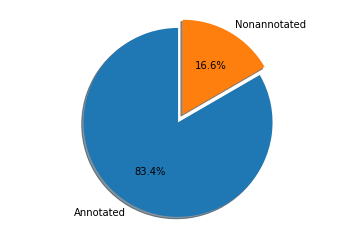

In [11]:
labels = 'Annotated', 'Nonannotated'
sizes = [42455, 50930-42455]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

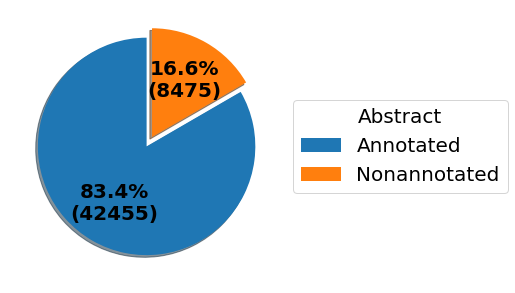

In [43]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

recipe = ["42455 Annotated",
          "8475 Nonannotated"]
explode = (0, 0.1)
data = [float(x.split()[0]) for x in recipe]
abstract = [x.split()[-1] for x in recipe]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), explode=explode, shadow=True, startangle=90,
                                  textprops=dict(color="black"))

ax.legend(wedges, abstract,
          title="Abstract",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=20,
          title_fontsize=20)

plt.setp(autotexts, size=20, weight="bold")
#ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [301]:
cancertype_flattened_df.to_csv(os.path.join(base_dir, "data/cancertype_df2.csv"),index=False)

In [303]:
cancertype_flattened_df.cancer_type.value_counts()

Breast Cancer                         7757
Lung Cancer                           5201
Leukemia                              4755
Prostate Cancer                       3878
Colorectal Cancer                     3412
Lymphoma                              2939
Bone Cancer                           2788
Melanoma                              2459
Liver Cancer                          2422
Kidney Cancer                         2262
Ovarian Cancer                        2216
Pancreatic Cancer                     1992
Brain Tumor                           1956
Head and Neck Cancer                  1914
Acute Myeloid Leukemia (AML)          1488
Multiple Myeloma                      1413
Sarcoma                               1407
Bladder Cancer                        1013
Skin Cancer                           1008
Gastric Cancer                         996
Gastrointestinal Tumor                 989
Endometrial Cancer                     962
Acute Lymphoblastic Leukemia (ALL)     903
Chronic Lym

In [312]:
cancer_counts29_df2=pd.read_csv(os.path.join(base_dir, 'data/abstract_cancer_counts29_df.csv'),index_col='cancer_type')

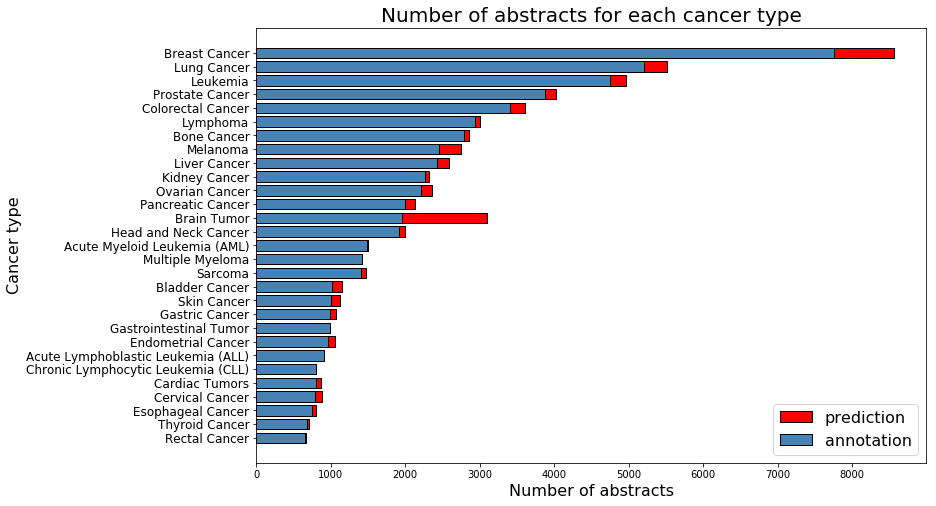

In [314]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
width = 0.75 # the width of the bars 
ind = np.arange(len(cancer_counts29_df2))  # the x locations for the groups
ax.barh(ind, cancer_counts29_df2.counts2, width, edgecolor='black',color='red',label='prediction')
ax.barh(ind, cancer_counts29_df2.counts1, width, edgecolor='black',color='steelblue',label='annotation')
ax.invert_yaxis()
plt.yticks(ind, labels = cancer_counts29_df2.index, fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0,110)
plt.ylabel('Cancer type', fontsize=16)
plt.xlabel('Number of abstracts', fontsize=16)
plt.title('Number of abstracts for each cancer type', fontsize=20)
plt.legend(fontsize=16)

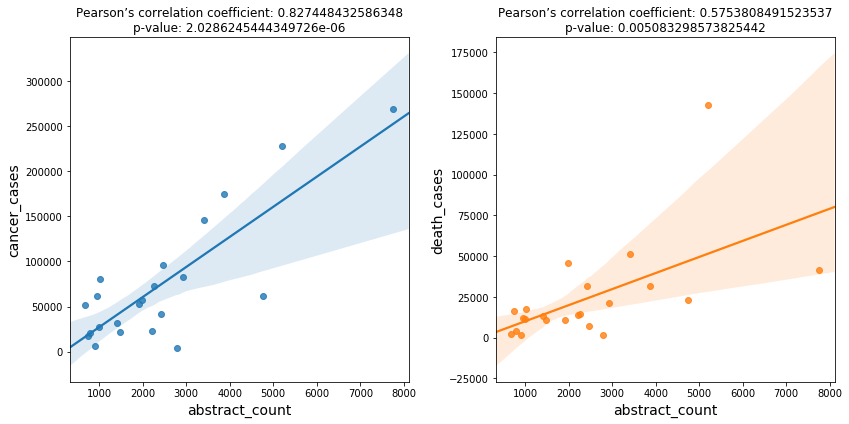

In [284]:
fig, axes = plt.subplots(1,2,figsize = (12,6))
#cancer_statistics=pd.read_csv(os.path.join(base_dir, 'data/cancer_statistics.csv'))

coef1, p1 = scipy.stats.pearsonr(cancer_statistics.counts1, cancer_statistics.new_cases)
coef2, p2 = scipy.stats.pearsonr(cancer_statistics.counts1, cancer_statistics.death_cases)

sns.regplot(x='counts1',y='new_cases',data=cancer_statistics,ax=axes[0])
axes[0].set_xlabel('abstract_count', fontsize=14)
axes[0].set_ylabel('cancer_cases', fontsize=14)
axes[0].set_title('Pearson’s correlation coefficient: {}\np-value: {}'.format(coef1, p1), fontsize=12)

sns.regplot(x='counts1',y='death_cases',data=cancer_statistics,ax=axes[1])
axes[1].set_xlabel('abstract_count', fontsize=14)
axes[1].set_ylabel('death_cases', fontsize=14)
axes[1].set_title('Pearson’s correlation coefficient: {}\np-value: {}'.format(coef2, p2), fontsize=12)

plt.tight_layout()

In [268]:
scipy.stats.pearsonr(cancer_statistics.counts1, cancer_statistics.new_cases)

(0.827448432586348, 2.0286245444349726e-06)

In [273]:
scipy.stats.pearsonr(cancer_statistics.counts1, cancer_statistics.death_cases)

(0.5753808491523537, 0.005083298573825442)